<a href="https://colab.research.google.com/github/juangross/IAPy/blob/main/IAPy_tp2_gross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Práctico 2

alumno: Juan Pablo Gross



Ejercicio 1
Se tiene un dataset con información referente a la lectura de gases realizada por una matriz de 6 sensores de bajo costo en instantes sucesivos de tiempo. A estas lecturas, se asocia la información de la actividad realizada en el recinto sensado. 

El conjunto de sensores utilizados se puede agrupar en dos categorías principales:


*    Sensores MQ (MQ2, MQ9, MQ135, MQ137, MQ138) que tienen gran sensibilidad, baja latencia y bajo costo; cada sensor puede responder a diferentes gases;
*    Sensor analógico de gas CO2 (MG-811) que tiene una excelente sensibilidad al dióxido de carbono y apenas se ve afectado por la temperatura y la humedad del aire.
El conjunto de datos contiene 1845 muestras recolectadas que describen 4 situaciones objetivo:
1.   Situación normal - Actividad: aire limpio, una persona que duerme, estudia o descansa. Muestras disponibles: 595.
2.   Preparación de comidas - Actividades: cocinar carne o pasta, verduras fritas. Una o dos personas en la habitación, circulación de aire forzado. Muestras disponibles: 515.
3.   Presencia de humo - Actividad: quemar papel y madera por un corto período de tiempo en una habitación con ventanas y puertas cerradas – Muestras disponibles: 195.
4.   Limpieza - Actividad: uso de detergentes en aerosol y líquidos con amoníaco y/o alcohol. La circulación de aire forzado se puede activar o desactivar - Muestras disponibles: 540.

Cada muestra está compuesta por 7 valores; los primeros seis valores son las salidas de los sensores, mientras que el último es el índice de la acción que generó los valores adquiridos por los mismos. Las cuatro situaciones diferentes están asociadas con una composición del aire distinta, teniendo en
cuenta que cualquier actividad produce sustancias químicas (respiración humana, exhalaciones de procesos metabólicos, liberación de volátiles por combustión y/o oxidación, evaporación de detergentes domésticos, etc.).

Los datos se encuentran en el archivo adjunto denominado "dataset_ADL_clasificacion.csv”. A continuación, se presenta una porción de este dataset:


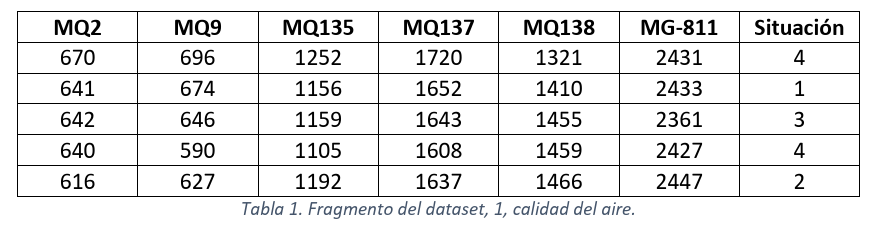


En la columna “Situación” se encuentra codificada la clase que indica si se trata de **una actividad normal (1), preparación de comidas (2), presencia de humo (3) o de limpieza (4).**
El objetivo es determinar si con estas observaciones es posible obtener un modelo que permita **clasificar** cada una de las 4 situaciones objetivo, a partir de los valores arrojados por los sensores.
Detallar y fundamentar cada aspecto de la solución propuesta, incluyendo los aspectos que crea conveniente y respondiendo como mínimo las siguientes premisas:


*   P1. ¿Qué clasificador se ajusta mejor a la solución buscada? ¿Por qué?
*   P2. En base a los resultados obtenidos, ¿Sería posible utilizar el modelo para predecir el comportamiento de nuevas mediciones?
*   P3. Evaluar aspectos relacionados al rendimiento en el proceso de entrenamiento y vincularlos con la relación costo/beneficio. 
*   P4. Ídem para los tiempos de inferencia o consulta, ¿Cuál es fundamental si  Pretendo utilizar un sistema en tiempo real con el modelo desarrollado?
*   P5. De los resultados visualizados en la matriz de confusión, ¿Para todas las clases el modelo seleccionado presenta el mismo comportamiento?
*   P6. ¿Existen problemas evidentes en este dataset? Si es así, ¿Cuáles son y cómo  Los solucionaría?
*   P7. ¿Son necesarios todos los sensores para que el modelo pueda identificar de manera eficiente las clases de interés?




In [ ]:
#importo material de trabajo
!git clone https://github.com/juangross/IAPy

Cloning into 'IAPy'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 96.73 KiB | 1.67 MiB/s, done.


In [ ]:
#funciones básicas
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#imprimo versiones de software utilizado
import os
import sys

#imprimo las versiones de las librerías que voy usando
print('Librerías usadas')
print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
#print ('numpy: '+ np.version.version)
print('numpy: {}'.format(np.__version__))
#print ('numpy: '+ np.__version__)

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Librerías usadas
python: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
matplotlib: 3.2.2
numpy: 1.22.4
